In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics


In [42]:
df = pd.read_csv('HR.csv')
df.head()
# df.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
df.mean()


satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [15]:
df.round().mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1.0,1.0,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [18]:
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [19]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [20]:
df.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [21]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [45]:
# Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.
# Определите две самые скоррелированные и две наименеескоррелированные переменные.
data_quantative = df.filter(items = ['satisfaction_level', 'last_evaluation', 'number_project', 
                                     'average_montly_hours', 'time_spend_company'])
data_quantative
# sns.pairplot(df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [46]:
corr = data_quantative.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [47]:
corr.min()

satisfaction_level     -0.142970
last_evaluation         0.105021
number_project         -0.142970
average_montly_hours   -0.020048
time_spend_company     -0.100866
dtype: float64

In [ ]:
# ответ: наименее скоррелированные переменные average_montly_hours и satisfaction_level, 
#     наиболее скоррелированные average_montly_hours и number_project 

In [43]:
# Рассчитайте сколько сотрудников работает в каждомдепартаменте
# df.groupby('department').head()
df.groupby('department').count()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


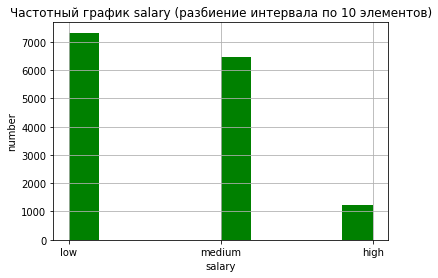

In [40]:
# Показать распределение сотрудников по зарплатам.
n, bins, patches = plt.hist(df['salary'], 10, facecolor='g')

plt.xlabel('salary')
plt.ylabel('number')
plt.title('Частотный график salary (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

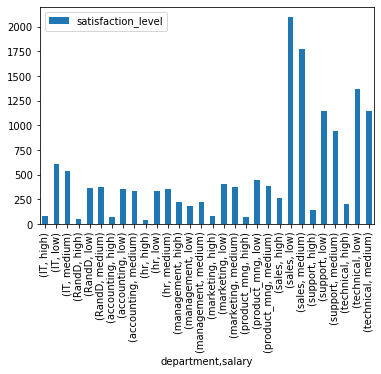

In [77]:
# Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности
data_salary = df.filter(items = ['department', 'salary', 'satisfaction_level'])
data_set = data_salary.groupby(['department', 'salary']).count().plot(kind='bar')
data_set


In [167]:
# Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

# from scipy.stats import spearmanr
# нулевая гипотеза- оиднаково проводят времени
from scipy import stats as st
alpha = 0.05
high_people = df[df['salary']=='high']['average_montly_hours']

low_people = df[data['salary']=='low']['average_montly_hours']

# result=stats.ttest_ind(high_people, low_people, equal_var= False)
# print (result)
# if (result.pvalue< alpha):
#     print ('отвергаем нулевую гипотезу, работают по разному')
# else:
#     print ('принимаем нулевую гипотезу')
    

In [165]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(high_people, 201.050337)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, среднее меньше 200')
else:
    print('Не отвергаем нулевую нулевую гипотезу,  в среднем больше 200 часов работают люди с высокой зарплатой')

Ttest_1sampResult(statistic=-0.8720175334567494, pvalue=0.38336816845093036)
Не отвергаем нулевую нулевую гипотезу,  в среднем больше 200 часов работают люди с высокой зарплатой


In [166]:
alpha = 0.05
result = st.ttest_1samp(low_people, 201.050337)

if (result.statistic > 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, среднее больше 200')
else:
    print('Не отвергаем нулевую гипотезу, люди с низкой зарплатой работают меньше')

Не отвергаем нулевую гипотезу, люди с низкой зарплатой работают меньше


In [109]:
# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
# Доля сотрудников с повышением за последние 5 лет
# ●Средняя степень удовлетворенности
# ●Среднее количество проектов

results = df.groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean', 
                                  'promotion_last_5years': ['sum','count']})
# results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()
aaa= df.groupby('left').agg(['sum', 'count'])['promotion_last_5years'].head()

results['value of achivement']= aaa['sum']/aaa['count']
results.head()


satisfaction_level number_project promotion_last_5years         \
                   mean           mean                   sum  count   
left                                                                  
0              0.666810       3.786664                   300  11428   
1              0.440098       3.855503                    19   3571   

     value of achivement  
                          
left                      
0               0.026251  
1               0.005321

In [ ]:
# Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, 
# предсказывающую уволился лисотрудник на основе имеющихся факторов
# (кроме department иsalary)Оценить качество модели на тестовой выборки



In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [137]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2)
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
8073,0.82,0.63,3,246,3,0,0,0,management,medium
4421,0.59,0.98,4,198,3,0,0,0,product_mng,low
958,0.41,0.50,2,153,3,0,1,0,technical,medium
3553,0.31,0.64,6,183,2,1,0,0,technical,low
5290,0.59,0.94,4,136,2,0,0,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
12933,0.62,0.69,4,184,3,0,0,0,technical,low
14528,0.37,0.46,2,153,3,0,1,0,sales,low
6540,0.95,0.75,5,235,3,1,0,0,support,low
11773,0.93,0.50,5,272,3,0,0,0,sales,low


In [138]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
4688,0.85,0.60,4,255,4,0,0,0,hr,low
543,0.89,0.92,5,237,5,0,1,0,sales,medium
6353,0.88,0.89,3,139,2,0,0,0,sales,low
14347,0.10,0.84,6,283,4,1,1,0,technical,low
516,0.10,0.89,6,247,4,0,1,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
12769,0.42,0.46,2,141,3,0,1,0,marketing,medium
7585,0.74,0.90,3,285,3,0,0,0,accounting,low
9808,0.56,0.89,3,163,3,1,0,0,technical,high
931,0.90,0.92,5,154,4,0,1,0,sales,low


In [139]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']
del data_train['department']
del data_test['department']
del data_train['salary']
del data_test['salary']


In [140]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
8073,0.82,0.63,3,246,3,0,0
4421,0.59,0.98,4,198,3,0,0
958,0.41,0.50,2,153,3,0,0
3553,0.31,0.64,6,183,2,1,0
5290,0.59,0.94,4,136,2,0,0
...,...,...,...,...,...,...,...
12933,0.62,0.69,4,184,3,0,0
14528,0.37,0.46,2,153,3,0,0
6540,0.95,0.75,5,235,3,1,0
11773,0.93,0.50,5,272,3,0,0


In [141]:
lda = LinearDiscriminantAnalysis()

In [142]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [143]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,1,0
2,0,0
3,1,0
4,1,1
...,...,...
2995,1,0
2996,0,0
2997,0,0
2998,1,0


In [146]:
lda.coef_

array([[-4.45183103,  0.75527347, -0.23422152,  0.00451893,  0.22869361,
        -1.07040214, -1.01465472]])